# CODECLAUSE

## Telecom Churn Prediction

AUTHOR : IRSHAD YASSEEN A

---

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading Dataframe

In [2]:
df = pd.read_csv("churn-bigml-20.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

---

# Preprocessing

In [4]:
df = pd.get_dummies(df, columns=['State'])

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object': 
        df[col] = label_encoder.fit_transform(df[col])

df

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,117,408,0,0,0,184.5,97,31.37,351.6,80,...,0,0,0,0,0,0,0,0,0,0
1,65,415,0,0,0,129.1,137,21.95,228.5,83,...,0,0,0,0,0,0,0,0,0,0
2,161,415,0,0,0,332.9,67,56.59,317.8,97,...,0,0,0,0,0,0,0,0,0,0
3,111,415,0,0,0,110.4,103,18.77,137.3,102,...,0,0,0,0,0,0,0,0,0,0
4,49,510,0,0,0,119.3,117,20.28,215.1,109,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,114,415,0,1,26,137.1,88,23.31,155.7,125,...,0,0,0,0,0,0,0,1,0,0
663,106,408,0,1,29,83.6,131,14.21,203.9,131,...,0,0,0,0,0,0,0,0,0,0
664,60,415,0,0,0,193.9,118,32.96,85.0,110,...,0,0,0,0,0,1,0,0,0,0
665,159,415,0,0,0,169.8,114,28.87,197.7,105,...,0,0,0,0,0,0,0,0,1,0


In [6]:
df['Churn'] = df['Churn'].replace({False: 0, True: 1})

In [7]:
correlations = df.corr()["Churn"]
correlations

Account length           0.012315
Area code                0.027129
International plan       0.181634
Voice mail plan         -0.113465
Number vmail messages   -0.102381
                           ...   
State_VT                -0.007818
State_WA                 0.038023
State_WI                 0.015752
State_WV                 0.011550
State_WY                -0.019089
Name: Churn, Length: 70, dtype: float64

In [8]:
df=df.drop(["Account length","Area code"],1)

C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_27664\2639210229.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop(["Account length","Area code"],1)


---

# Splits

In [9]:
x=df.drop("Churn",1)
y=df["Churn"]

C:\Users\Irshad Yasseen A\AppData\Local\Temp\ipykernel_27664\1846533079.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=df.drop("Churn",1)


In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state = 42,shuffle=True)

---

# Logistic model

In [61]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=5000)
classifier.fit(x_train, y_train)

LogisticRegression(max_iter=5000)

# Confusion Matrix

In [62]:
y_pred = classifier.predict(x_test)

In [63]:
import seaborn as sns

<Axes: >

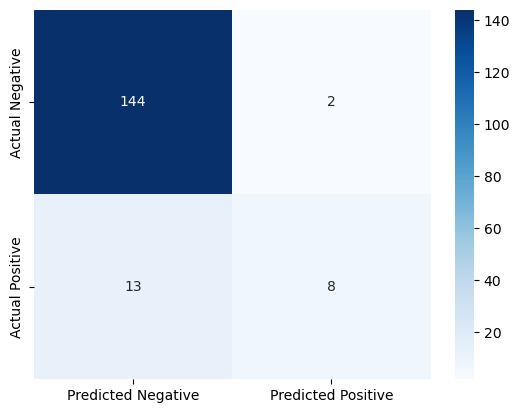

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score
cf=confusion_matrix(y_test, y_pred)

sns.heatmap(cf, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Predicted Negative", "Predicted Positive"], 
            yticklabels=["Actual Negative", "Actual Positive"])

In [65]:
accuracy_score(y_test,y_pred)

0.9101796407185628

# Desition Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

y_pred_tree = decision_tree.predict(x_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy:", accuracy_tree)


Decision Tree Accuracy: 0.8922155688622755


<Axes: >

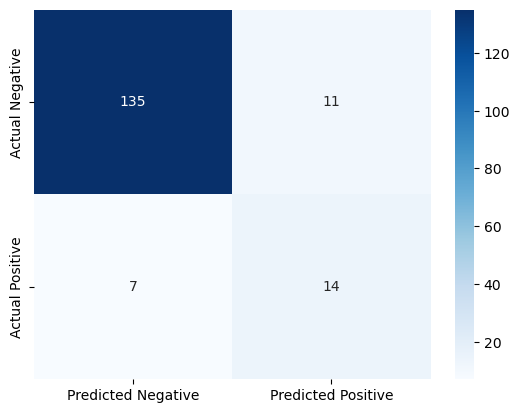

In [67]:
cf=confusion_matrix(y_test, y_pred_tree)

sns.heatmap(cf, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Predicted Negative", "Predicted Positive"], 
            yticklabels=["Actual Negative", "Actual Positive"])